In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from numpy.linalg import eig

In [2]:
# two dimension data
data = np.array([[3,4],[2,8],[6,9],[10,12]])

In [3]:
print(data)

[[ 3  4]
 [ 2  8]
 [ 6  9]
 [10 12]]


In [6]:
#create dataframe
df = pd.DataFrame(data,columns = ["ml","dl"])
df

,ml,dl
0,3,4
1,2,8
2,6,9
3,10,12


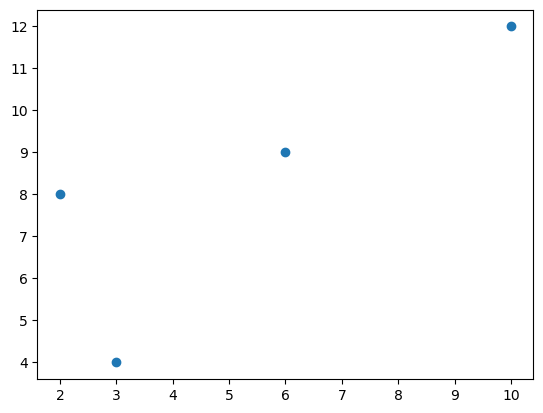

In [7]:
plt.scatter(df['ml'],df['dl'])

### PCA STEPS

1. Standarisation of the data
2. cov matrix
3. eig value and eog vector
4. finf Principle component

### 1. Standarisation of the data

In [8]:
data.T       # Transpose

array([[ 3,  2,  6, 10],
       [ 4,  8,  9, 12]])

In [20]:
np.mean(data, axis = 1)  # column wise 


array([ 3.5,  5. ,  7.5, 11. ])

In [21]:
meanbycol =np.mean(data, axis = 0)   # Row wise mean
meanbycol

array([5.25, 8.25])

In [23]:
data

array([[ 3,  4],
       [ 2,  8],
       [ 6,  9],
       [10, 12]])

In [24]:
print(3-5.25)

-2.25


In [25]:
scaled_data = data - meanbycol
scaled_data

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

### 2.  Covariance Matrix

In [28]:
cov_mat = np.cov(scaled_data.T)
cov_mat

array([[12.91666667,  9.58333333],
       [ 9.58333333, 10.91666667]])

### 3. eign value and eign vector

In [30]:
eig_val, eig_vect = np.linalg.eig(cov_mat)

In [31]:
eig_val  # got 2 eign value as you are getting qudratic equn value

array([21.55203266,  2.28130068])

In [32]:
eig_vect  # 2*2

array([[ 0.74289445, -0.66940857],
       [ 0.66940857,  0.74289445]])

In [33]:
scaled_data  # 4*2

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [34]:
eig_vect.T.dot(scaled_data.T).T
# dot is used for projection of the data

array([[-4.51649894, -1.65113213],
       [-2.58175911,  1.98985424],
       [ 1.05922727,  0.05511441],
       [ 6.03903078, -0.39383652]])

In [35]:
from sklearn.decomposition import PCA
pca = PCA()

In [36]:
pca.fit_transform(scaled_data)

array([[-4.51649894, -1.65113213],
       [-2.58175911,  1.98985424],
       [ 1.05922727,  0.05511441],
       [ 6.03903078, -0.39383652]])

In [37]:
pd.DataFrame(data = pca.fit_transform(scaled_data), columns = ["PC1","PC2"])

,PC1,PC2
0,-4.516499,-1.651132
1,-2.581759,1.989854
2,1.059227,0.055114
3,6.039031,-0.393837


In [38]:
pca.inverse_transform(pca.fit_transform(scaled_data))

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [39]:
scaled_data

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [40]:






pca.explained_variance_ratio_  # this two principle componet

array([0.90428109, 0.09571891])

In [41]:
0.90428109 + 0.09571891  

# PC1 cover 90% variace of the data
# PC2 cover 10 % variance of the data

1.0